In [1]:
#importing libraries that are needed
import numpy as np 
import pandas as pd
import os
from glob import glob #importing for image search
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
prelim_xray_df = pd.read_csv('archive\Data_Entry_2017.csv')
prelim_xray_df.head(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN


In [3]:
prelim_image_paths = {os.path.basename(x): x for x in glob(os.path.join('archive', 'images_*', '*', '*.png'))}

print('Scans found:', len(prelim_image_paths), 'Total Headers', prelim_xray_df.shape[0])

Scans found: 112120 Total Headers 112120


- In here scanning the archive using the glob as an image scanner inside the file

In [4]:
prelim_xray_df['path'] = prelim_xray_df['Image Index'].map(prelim_image_paths.get)
prelim_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
29102,00007576_033.png,No Finding,33,7576,33,M,AP,2500,2048,0.168000,0.168000,NaN,archive\images_004\images\00007576_033.png
111914,00030664_000.png,No Finding,0,30664,34,M,PA,2021,2021,0.194311,0.194311,NaN,archive\images_012\images\00030664_000.png
25553,00006717_005.png,No Finding,5,6717,58,F,PA,2048,2500,0.171000,0.171000,NaN,archive\images_004\images\00006717_005.png


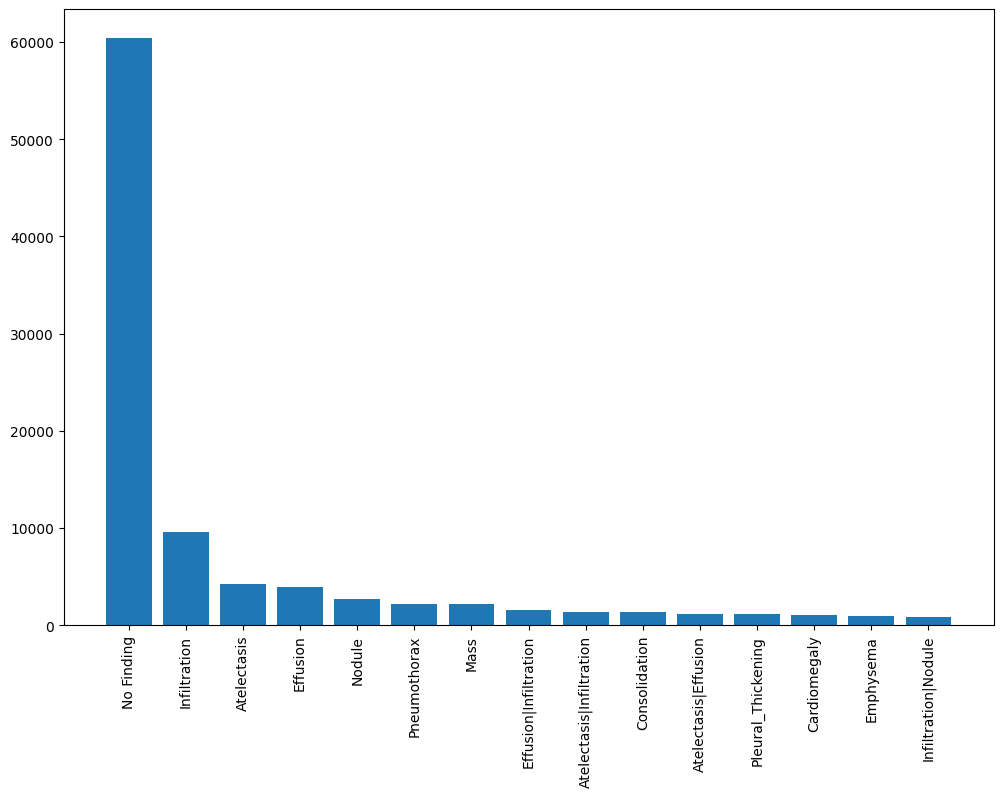

In [5]:
label_counts = prelim_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

- getting all the available labels inside the file

In [6]:
prelim_xray_df['Finding Labels'] = prelim_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))

from itertools import chain

prelim_labels = np.unique(list(chain(*prelim_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
prelim_labels = [x for x in prelim_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(prelim_labels), prelim_labels))

for c_label in prelim_labels:
    if len(c_label)>1: # leave out empty labels
        prelim_xray_df[c_label] = prelim_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
        
prelim_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
78611,00019278_000.png,,0,19278,65,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66108,00016341_006.png,,6,16341,48,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60500,00014938_004.png,,4,14938,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
prelim_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

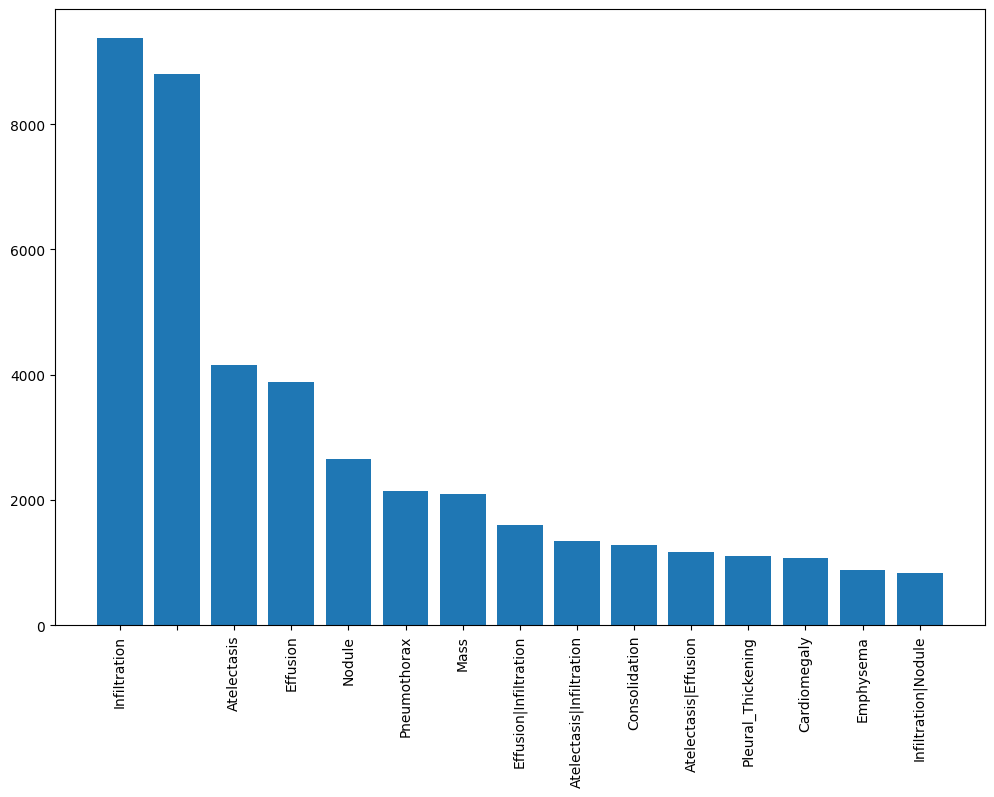

In [8]:
sample_weights = prelim_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
prelim_xray_df = prelim_xray_df.sample(60000, weights=sample_weights)

label_counts = prelim_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

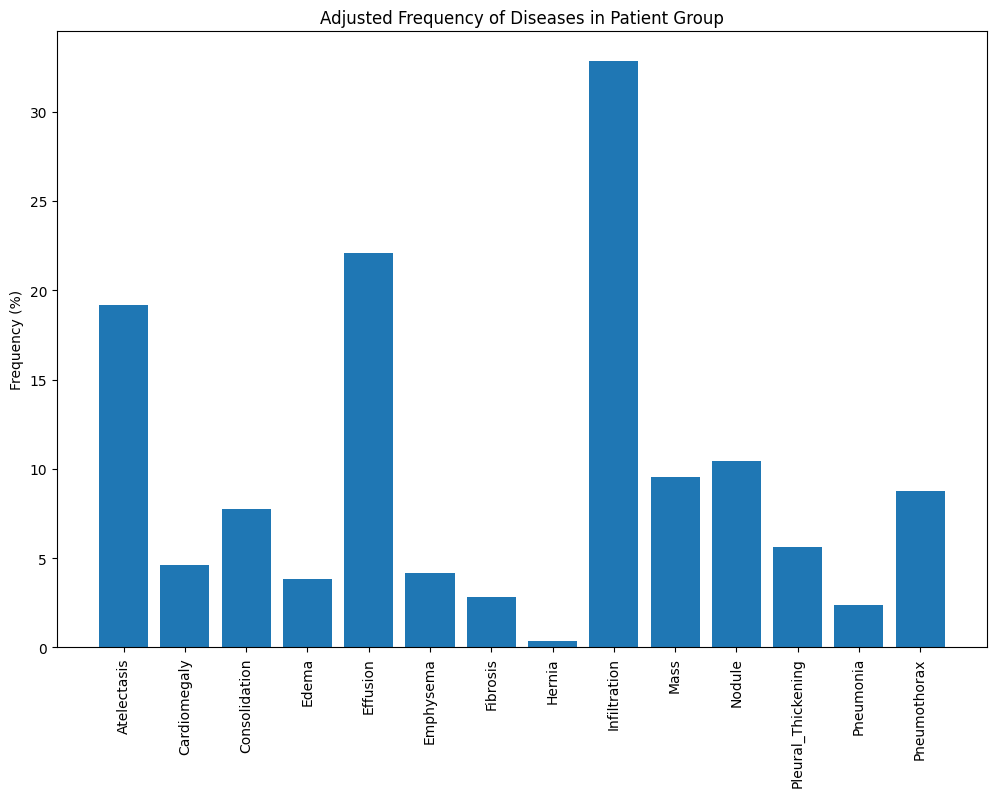

In [9]:
label_counts = 100*np.mean(prelim_xray_df[prelim_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(prelim_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [10]:
prelim_xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
69044,00017036_026.png,Effusion|Infiltration|Mass,26,17036,29,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
73171,00018015_018.png,Infiltration,18,18015,38,M,PA,3056,2504,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14488,00003765_001.png,Mass,1,3765,39,M,PA,2048,2500,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307,00000071_006.png,Effusion|Infiltration,6,71,69,F,PA,2602,2357,0.143,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13046,00003394_001.png,Atelectasis|Infiltration,1,3394,69,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(prelim_xray_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = prelim_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'test', test_df.shape[0])

train 45000 test 15000


In [12]:
test_df, val_df = train_test_split(test_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = test_df['Finding Labels'].map(lambda x: x[:4]))
print('test', test_df.shape[0], 'val', val_df.shape[0])

test 11250 val 3750


- in here, I used sklearn to split the data into train, test and val dataset

In [13]:
train_df['Findings'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
test_df['Findings'] = test_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
val_df['Findings'] = val_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

- adding another label into the dataset where it just copy the finding labels column but in a list form

In [14]:
train_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Findings
5654,00001525_001.png,,1,1525,48,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
89074,00022106_018.png,Atelectasis|Edema,18,22106,22,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Atelectasis, Edema]"
14729,00003841_013.png,Atelectasis,13,3841,41,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Atelectasis]


In [15]:
#transforming the images into values
from keras.preprocessing.image import ImageDataGenerator

core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

creating a parameter for image data generator

In [16]:
prelim_xray_df.columns[-14:]

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [17]:
train_gen = core_idg.flow_from_dataframe(train_df,
                             x_col = 'path',
                            y_col = prelim_xray_df.columns[-14:], 
                            class_mode = 'raw',
                            target_size = (224, 224),
                             color_mode = 'grayscale',
                            batch_size = 32)

test_gen = core_idg.flow_from_dataframe(test_df, 
                             x_col = 'path',
                            y_col = prelim_xray_df.columns[-14:], 
                            class_mode = 'raw',
                            target_size = (224, 224),
                             color_mode = 'grayscale',
                            batch_size = 256)

test_x, test_y = next(core_idg.flow_from_dataframe(dataframe=val_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = prelim_xray_df.columns[-14:], 
                             class_mode = 'raw',
                            target_size = (224, 224),
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 45000 validated image filenames.
Found 11250 validated image filenames.
Found 3750 validated image filenames.


- ine here using the core_idg, we created a data using the data we used for train test split

In [18]:
t_x, t_y = next(train_gen)

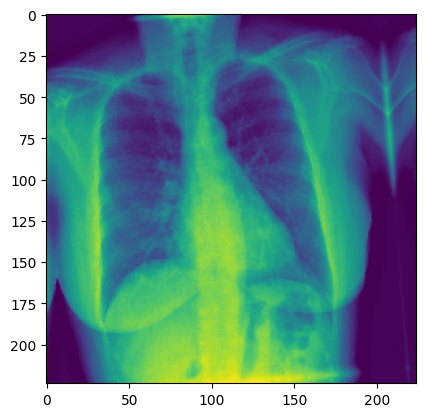

In [19]:
plt.imshow(test_x[69])

##CNN

In [20]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam

In [29]:
model = Sequential()

model.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu', input_shape = t_x.shape[1:]))
model.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu'))
model.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(len(prelim_labels), activation = 'sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 223, 223, 32)      160       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      4128      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      16448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)
hist_1 = model.fit(train_gen,
                   epochs = 5,
                   verbose = 1,
                   steps_per_epoch = 50,
                   validation_data=(test_x, test_y))

Epoch 1/5
50/50 [==============================] - 478s 9s/step - loss: 0.6835 - binary_accuracy: 0.8986 - val_loss: 0.6734 - val_binary_accuracy: 0.9058
Epoch 2/5
50/50 [==============================] - 469s 9s/step - loss: 0.6641 - binary_accuracy: 0.9058 - val_loss: 0.6545 - val_binary_accuracy: 0.9058
Epoch 3/5
50/50 [==============================] - 470s 9s/step - loss: 0.6459 - binary_accuracy: 0.9032 - val_loss: 0.6365 - val_binary_accuracy: 0.9058
Epoch 4/5
50/50 [==============================] - 451s 9s/step - loss: 0.6285 - binary_accuracy: 0.9028 - val_loss: 0.6194 - val_binary_accuracy: 0.9058
Epoch 5/5
50/50 [==============================] - 469s 9s/step - loss: 0.6120 - binary_accuracy: 0.9029 - val_loss: 0.6031 - val_binary_accuracy: 0.9058


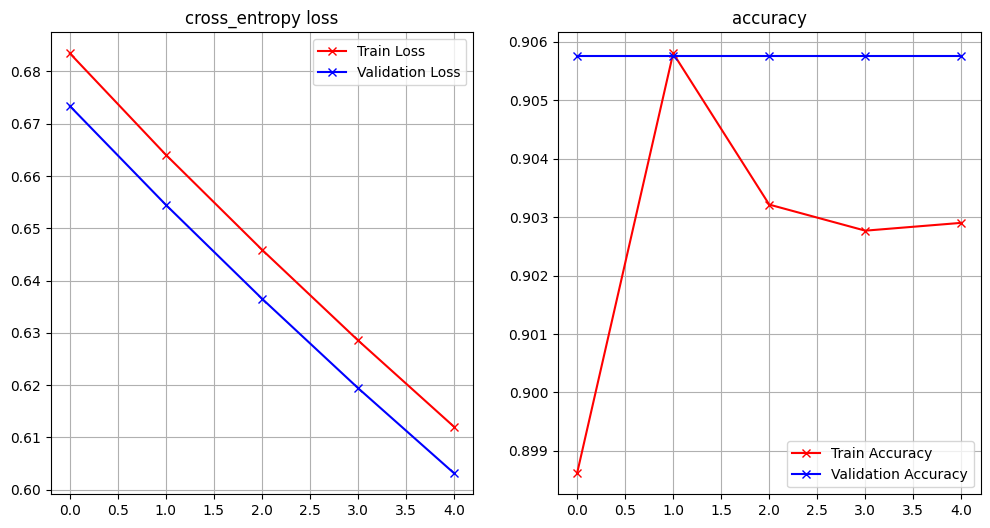

In [31]:
def plot_loss_accuracy(hist_1):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(hist_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(hist_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(hist_1.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(hist_1.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(hist_1)

In [32]:
y_pred = model.predict(test_x, batch_size = 32, verbose = True)

32/32 [==============================] - 35s 1s/step


In [33]:
print("Shape of test_y:", test_y.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of test_y: (1024, 14)
Shape of y_pred: (1024, 14)


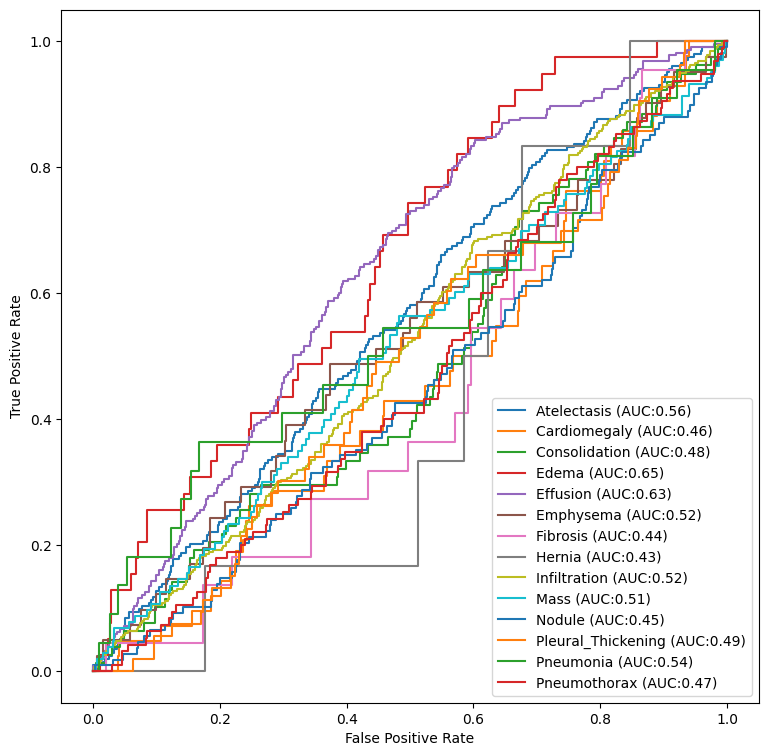

In [26]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(prelim_labels):
    fpr, tpr, thresholds = roc_curve(test_y[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

##USING PRE-TRAINED MODEL

In [42]:
from keras.applications import efficientnet

pre_trained_model = efficientnet.EfficientNetB7 (input_shape = t_x.shape[1:], include_top = False,
                                                 weights = None)

pre_trained_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 1)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 1)          3         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 1)          0         ['normalization_2

In [43]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [45]:
from keras.layers import GlobalAveragePooling2D

x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(prelim_labels), activation = 'sigmoid')(x)

In [50]:
from keras.models import Model
finetuned_pre_trained_model = Model(inputs = pre_trained_model.input, outputs = predictions)
finetuned_pre_trained_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 1)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 1)          3         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 1)          0         ['normalization_2[0][0]'

In [51]:
finetuned_pre_trained_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)
hist_pre_trained = finetuned_pre_trained_model.fit(train_gen,
                   epochs = 5,
                   verbose = 1,
                   steps_per_epoch = 50,
                   validation_data=(test_x, test_y))

Epoch 1/5
50/50 [==============================] - 1002s 19s/step - loss: 0.5805 - binary_accuracy: 0.8978 - val_loss: 0.4071 - val_binary_accuracy: 0.9058
Epoch 2/5
50/50 [==============================] - 893s 18s/step - loss: 0.3187 - binary_accuracy: 0.9060 - val_loss: 0.2821 - val_binary_accuracy: 0.9058
Epoch 3/5
50/50 [==============================] - 727s 15s/step - loss: 0.2761 - binary_accuracy: 0.9058 - val_loss: 0.2763 - val_binary_accuracy: 0.9058
Epoch 4/5
50/50 [==============================] - 683s 14s/step - loss: 0.2745 - binary_accuracy: 0.9069 - val_loss: 0.2747 - val_binary_accuracy: 0.9058
Epoch 5/5
50/50 [==============================] - 783s 16s/step - loss: 0.2753 - binary_accuracy: 0.9051 - val_loss: 0.2742 - val_binary_accuracy: 0.9058


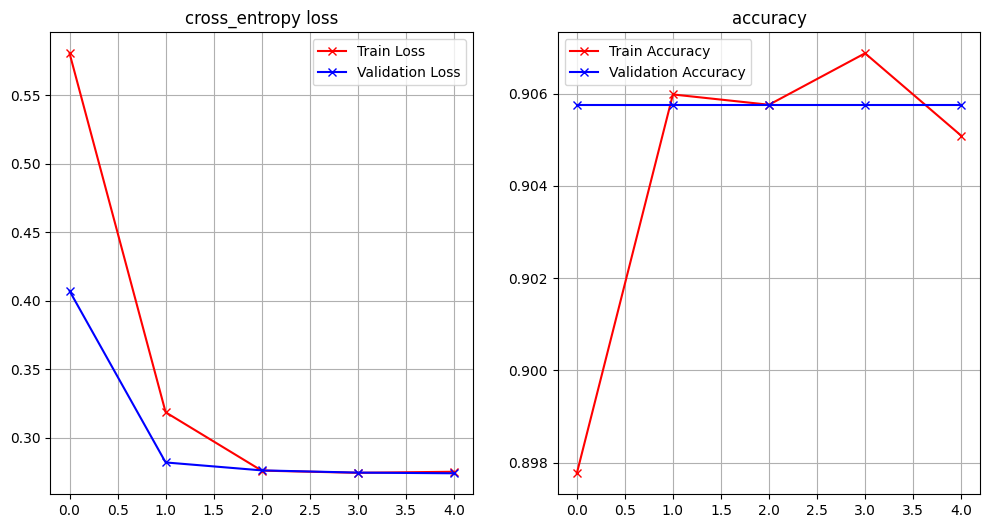

In [52]:
def plot_loss_accuracy(hist_pre_trained):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(hist_pre_trained.history["loss"],'r-x', label="Train Loss")
    ax.plot(hist_pre_trained.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(hist_pre_trained.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(hist_pre_trained.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(hist_pre_trained)

In [53]:
y_pred_pretrained = finetuned_pre_trained_model.predict(test_x, batch_size = 32, verbose = True)

32/32 [==============================] - 328s 10s/step


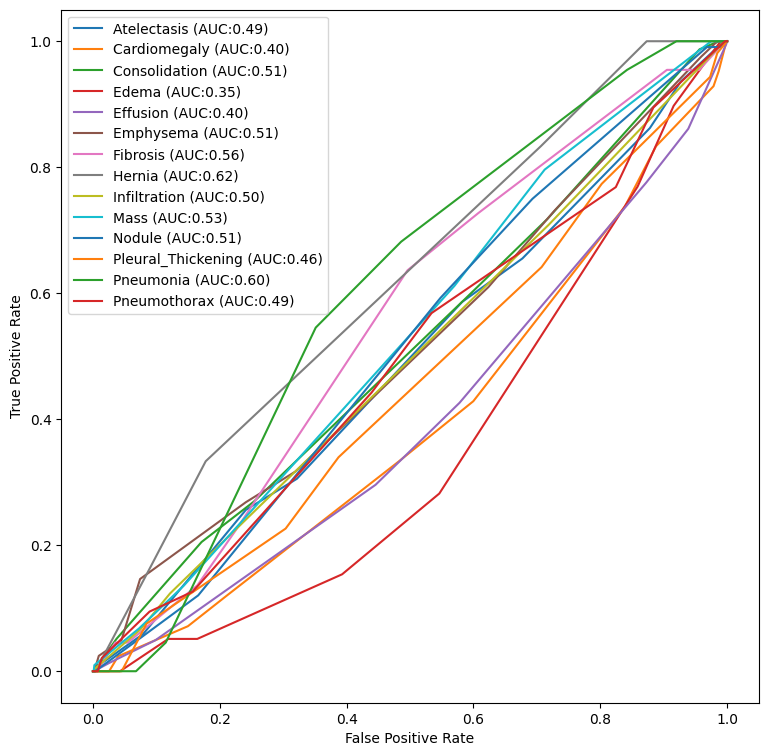

In [54]:
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(prelim_labels):
    fpr, tpr, thresholds = roc_curve(test_y[:,idx].astype(int), y_pred_pretrained[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

- To conclude, this prelim skills exam is challenging since most of the part of this exam are not teached especially the Multilabel classification. I admit that this prelim exam is hard and need more time get better results in accuracy. Also, I applied everything that I have learned during the prelim period on this exam but I think I still lack some knowledge therefore I will improve myself more in the coming weeks.